In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
import nltk


In [3]:
#nltk.download('punkt')

In [4]:
#nltk.download('stopwords')


In [5]:
from nltk.corpus import stopwords

In [6]:
pd.set_option("display.max_rows",None)
data = pd.read_csv('AmazonReview.csv')

data


Review  Sentiment
0      Fast shipping but this product is very cheaply...          1
1      This case takes so long to ship and it's not e...          1
2      Good for not droids. Not good for iPhones. You...          1
3      The cable was not compatible between my macboo...          1
4      The case is nice but did not have a glow light...          1
5      The cable keeps coming up with message that th...          1
6      This pos broke off in my phone after 3 uses an...          1
7      This product suck its hard 2 hear wat other ar...          1
8      Music cuts off within 30 secs. I like Aukey's ...          1
9      Yeah when they say mirror screen they mean it ...          1
10     No power on the AC adapter. Tried several outl...          1
11     Purchased product from vendor Outlet. Bought i...          1
12     It is very Tedious to get this thing to work a...          1
13     Like others before me I was fooled by the init...          1
14     Give it one star only because I recieved it in...          1
15     The charger stopped working after three weeks ...          1
16     This device is being sold under different name...          1
17                                            It is cute          1
18     It seemed like a great deal! But reality set i...          1
19     Ready compatibility that lead me to believe it...          1
20     This product failed to work in my Garmin. Garm...          1
21     This product worked for about three minutes.  ...          1
22     Well i was disappointed that i waited almost a...          1
23     stopped working after one week. company refuse...          1
24     at 500watts i expected it to be average 50watt...          1
25     I bought this a couple of years ago, and start...          1
26     This lasted about 45 days. The MP3 player neve...          1
27     I felt deceived, I though it was an actually c...          1
28     This is damaged fast but use caution you have,...          1
29     Extremely un-happy with these speakers i had g...          1
30     The headset was damaged and would not work.<br...          1
31     I was expecting a case with two pieces that sn...          1
32     This product title lists it as fitting a TomTo...          1
33     I bought this item for my security job and it ...          1
34     Didn't fit right...was a waste of money...shou...          1
35     So i ordered 3 chargers and surprisingly, they...          1
36     No instructions or info on best way to install...          1
37     useless as ticks fallin off a dead dog.  Have ...          1
38     I used this watch because of the various funct...          1
39     Do not buy it!!! Does not work at all!! Called...          1
40     The quality of this product was disappointing....          1
41     unfortunately I  found myself in a position  w...          1
42     This Ipod armband holder was very poorly made....          1
43     Well, I bought this armband to replace an olde...          1
44     I bought this GPS and had to return it as it d...          1
45     I got this thing so my wife could play it thro...          1
46     Unfortunately very delicate.  I'm very careful...          1
47     I had this charger plugged into my car for a c...          1
48     These are so poorly made! I was so excited bec...          1
49     I ordered the 9ft Lightning Cable. I will say ...          1
50     it says on the box and a employee from barns a...          1
51     Don't bother buying. I have a 3rd generation i...          1
52     mine is set up in Ukrainian. the user manual t...          1
53     It definitely looks like a lot of stuff for 9....          1
54     These were really cute. I thought they would b...          1
55     Did not function properly.  Use to own a unit ...          1
56     Okay, I don't  have this mp3 player, but just ...          1
57     The video quality makes this camera worthless....          1
58     I bought this recently and then

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [8]:
data.dropna(inplace=True)


In [9]:
data.loc[data["Sentiment"]<=3,"Sentiment"]=0
data.loc[data["Sentiment"]>3,"Sentiment"]=1

In [10]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
def clean_review(review):
    cleanreview = " ".join(word for word in review.split() if word.lower() not in stopwords)
    # joining here so no need of list comprehension
    
    return cleanreview
data["Review"] = data["Review"].apply(clean_review)

In [11]:
data.head()

Review  Sentiment
0  Fast shipping product cheaply made brought gra...          0
1       case takes long ship even worth DONT BUY!!!!          0
2  Good droids. good iPhones. cannot use features...          0
3  cable compatible macbook iphone. Also connecto...          0
4  case nice glow light. I'm disappointed product...          0

In [12]:
data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

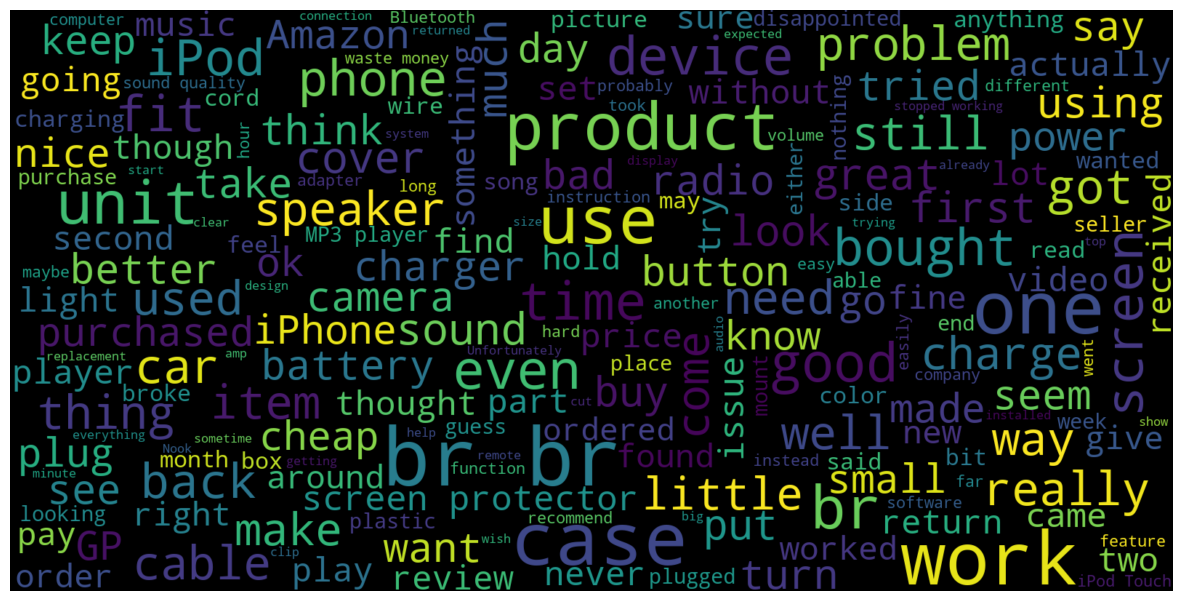

In [13]:
consolidated = " ".join(word for word in data["Review"][data["Sentiment"]==0].astype('str'))
wordcloud = WordCloud(width = 1600,height=800,random_state = 21,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
data[data["Sentiment"]==0].head()

Review  Sentiment
0  Fast shipping product cheaply made brought gra...          0
1       case takes long ship even worth DONT BUY!!!!          0
2  Good droids. good iPhones. cannot use features...          0
3  cable compatible macbook iphone. Also connecto...          0
4  case nice glow light. I'm disappointed product...          0

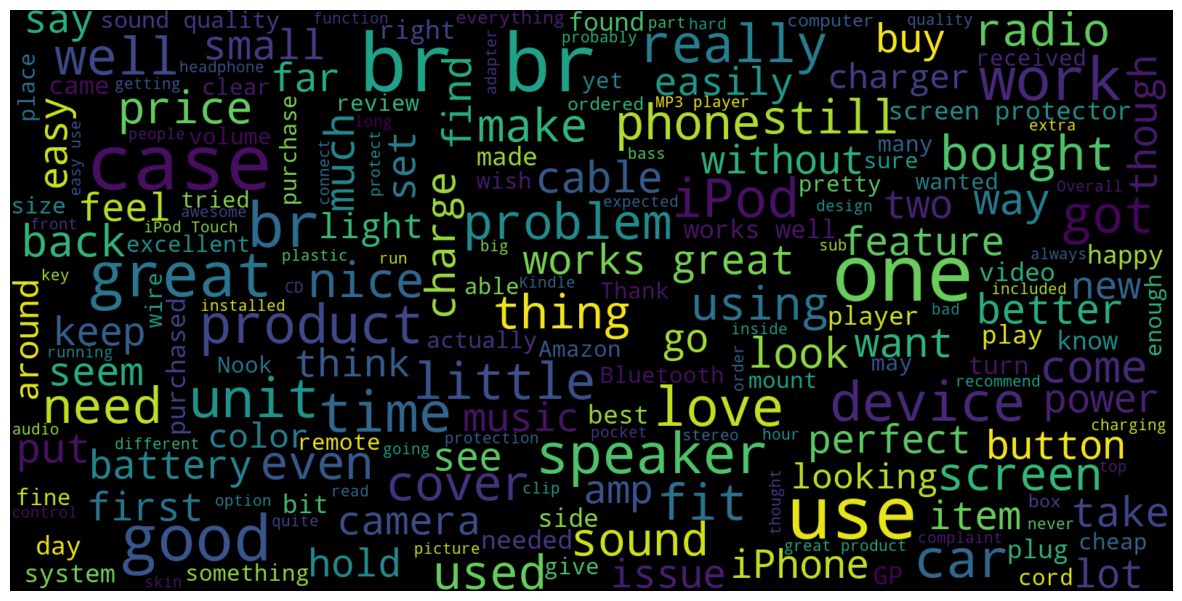

In [15]:
consolidated = " ".join(word for word in data["Review"][data["Sentiment"]==1].astype("str"))
worcloud = WordCloud(width = 1600,height = 800,random_state = 21,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
cv = TfidfVectorizer(max_features = 2500)
# Many words may be rare or occur infrequently, making them less relevant for modeling purposes. Setting max_features helps focus on the most informative features
x = cv.fit_transform(data["Review"]).toarray() # we didnot use corpus

In [17]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,data['Sentiment'],test_size=0.25, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)


#testing the model
ypred_test=model.predict(x_test)
ypred_train=model.predict(x_train)

from sklearn.model_selection import cross_val_score
print("cv", cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy").mean())

#model accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
print("test_accuracy ",accuracy_score(y_test,ypred_test))
print("train_accuracy ",accuracy_score(y_train,ypred_train))


cv 0.811936651551525
test_accuracy  0.8112
train_accuracy  0.849005280281615


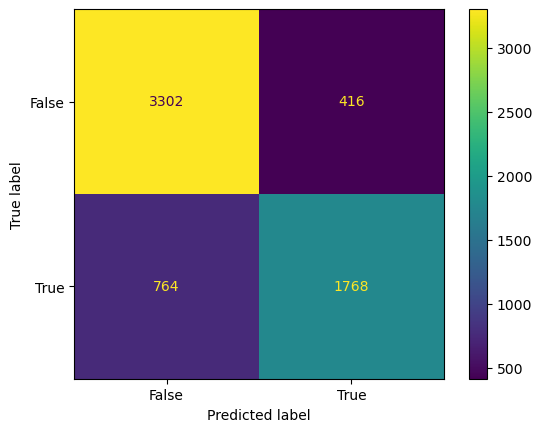

In [19]:
from sklearn import metrics
cm = confusion_matrix(y_test,ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(cm,display_labels = [False,True])
cm_display.plot()
plt.show()

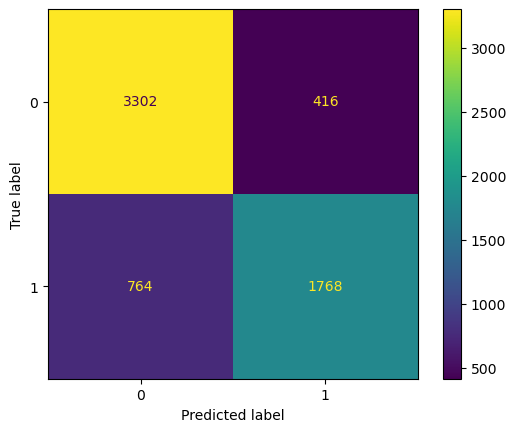

In [20]:
from sklearn import metrics
cm = confusion_matrix(y_test,ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(cm,display_labels = [0,1])
cm_display.plot()
plt.show()

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

# testing the model
ypred_test=model.predict(x_test)
ypred_train=model.predict(x_train)

from sklearn.model_selection import cross_val_score
print("cv", cross_val_score(nb,x_train,y_train,cv=5,scoring="accuracy").mean())

#model accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
print("test_accuracy ",accuracy_score(y_test,ypred_test))
print("train_accuracy ",accuracy_score(y_train,ypred_train))

cv 0.7911353569840847
test_accuracy  0.8112
train_accuracy  0.849005280281615


In [ ]:
import warnings
warnings.simplefilter("ignore")

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Initialize models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    #"ANN": MLPClassifier(max_iter=1000)  # Artificial Neural Network model
}

# Initialize dictionaries to store evaluation metrics for each model
train_acc = {}
test_acc = {}
cv_score_train = {}
precision_train = {}
recall_train = {}
f1_train = {}
train_acc_imp = {}
test_acc_imp = {}
cv_score_train_imp = {}
precision_train_imp = {}
recall_train_imp = {}
f1_train_imp = {}
best_params = {}
best_random_state = {}

# Variables for PCA results
train_acc_pca = {}
test_acc_pca = {}
cv_score_train_pca = {}
precision_train_pca = {}
recall_train_pca = {}
f1_train_pca = {}

# List of models that require feature scaling
models_needing_scaling = [
    "Logistic Regression", "SVM", "K Neighbors", "ANN"
]

# Iterate over each model for evaluation
for name, model in models.items():
    train_acc_temp = []  # Temporary list for training accuracy
    test_acc_temp = []   # Temporary list for testing accuracy
    cv_temp = []         # Temporary list for cross-validation scores

    # Determine the best random state by iterating through multiple options
    for i in range(0, 100):
        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x,data['Sentiment'], train_size=0.8, random_state=i)
        
        # Scale features only if the model requires it
        if name in models_needing_scaling:
            scaler = MinMaxScaler()  # Initialize MinMaxScaler
            x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
            x_test_scaled = scaler.transform(x_test)        # Transform testing data
        else:
            x_train_scaled, x_test_scaled = x_train, x_test  # No scaling for other models

        # Fit the model on the scaled (or original) training data
        model.fit(x_train_scaled, y_train)

        # Make predictions on training and testing data
        ypred_train = model.predict(x_train_scaled)
        ypred_test = model.predict(x_test_scaled)

        # Collect evaluation metrics
        cv_temp.append(cross_val_score(model, x_train_scaled, y_train, cv=5).mean())  # Cross-validation score
        train_acc_temp.append(accuracy_score(y_train, ypred_train))  # Training accuracy
        test_acc_temp.append(accuracy_score(y_test, ypred_test))     # Testing accuracy

    # Create a DataFrame to analyze accuracy and CV scores
    em = pd.DataFrame({"train_acc": train_acc_temp, "cv": cv_temp, "test_acc": test_acc_temp})
    gm = em[(abs(em["test_acc"] - em["cv"]) <= 0.05)]  # Filter to find models with stable test and CV scores
    rs = gm[gm["test_acc"] == gm["test_acc"].max()].index.tolist()[0]  # Select best random state
    best_random_state[name] = rs  # Store best random state for the model

    # Split the data again using the best random state
    x_train, x_test, y_train, y_test = train_test_split(x, data['Sentiment'], train_size=0.8, random_state=rs)

    # Scale features again for the best random state if the model requires it
    if name in models_needing_scaling:
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    else:
        x_train_scaled, x_test_scaled = x_train, x_test  # No scaling

    # Prepare hyperparameter grid for RandomizedSearchCV based on model type
    param_grid = {}
    if isinstance(model, (KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier,
                          GradientBoostingClassifier, AdaBoostClassifier)):
        if isinstance(model, KNeighborsClassifier):
            param_grid = {"n_neighbors": list(range(1, 50))}
        elif isinstance(model, SVC):
            param_grid = {"C": [0.1, 0.01, 1, 10, 100], "kernel": ["linear", "rbf", "sigmoid", "poly"]}
        elif isinstance(model, DecisionTreeClassifier):
            param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(1, 16))}
        elif isinstance(model, RandomForestClassifier):
            param_grid = {"n_estimators": list(range(1, 20))}
        elif isinstance(model, GradientBoostingClassifier):
            param_grid = {"n_estimators": list(range(50, 201, 50)), "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
        elif isinstance(model, AdaBoostClassifier):
            param_grid = {"n_estimators": list(range(1, 21))}
    elif isinstance(model, MLPClassifier):
        param_grid = {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ["relu", "tanh", "logistic"],
            "solver": ["adam", "sgd"],
            "learning_rate": ["constant", "adaptive"]
        }

    # Perform Randomized Search for best hyperparameters
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring="accuracy", cv=5, n_iter=10, random_state=rs)
    random_search.fit(x_train_scaled, y_train)  # Fit the search to training data
    best_params[name] = random_search.best_params_  # Store best parameters found
    model = random_search.best_estimator_  # Update model to the best estimator

    # Set random_state for models that require it
    if hasattr(model, 'random_state'):
        model.random_state = best_random_state[name]

    # Fit the model and collect metrics without important features
    model.fit(x_train_scaled, y_train)
    ypred_train = model.predict(x_train_scaled)
    ypred_test = model.predict(x_test_scaled)
    train_acc[name] = accuracy_score(y_train, ypred_train)
    test_acc[name] = accuracy_score(y_test, ypred_test)
    cv_score_train[name] = cross_val_score(model, x_train_scaled, y_train, cv=5).mean()
    precision_train[name] = precision_score(y_train, ypred_train)
    recall_train[name] = recall_score(y_train, ypred_train)
    f1_train[name] = f1_score(y_train, ypred_train)

    # Feature Importance (Only for models that support it)
    if hasattr(model, 'feature_importances_'):  # Check if the model has feature importances
        importances = model.feature_importances_
        feats_ab = pd.DataFrame(importances, index=x.columns, columns=["importance"])  # Create DataFrame of importances
        imp_feats = feats_ab[feats_ab["importance"] > 0].index.tolist()  # Identify important features

        # Print important feature names
        print(f"Important Features for {name}: {imp_feats}")

        # Reduce dataset to important features
        x_train_imp = x_train[imp_feats]
        x_test_imp = x_test[imp_feats]

        # Refit model using important features only
        if name in models_needing_scaling:
            x_train_imp_scaled = scaler.fit_transform(x_train_imp)
            x_test_imp_scaled = scaler.transform(x_test_imp)
        else:
            x_train_imp_scaled, x_test_imp_scaled = x_train_imp, x_test_imp  # No scaling

        # Fit model on important features
        model.fit(x_train_imp_scaled, y_train)
        ypred_train_imp = model.predict(x_train_imp_scaled)
        ypred_test_imp = model.predict(x_test_imp_scaled)

        # Collect metrics with important features
        train_acc_imp[name] = accuracy_score(y_train, ypred_train_imp)
        test_acc_imp[name] = accuracy_score(y_test, ypred_test_imp)
        cv_score_train_imp[name] = cross_val_score(model, x_train_imp_scaled, y_train, cv=5).mean()
        precision_train_imp[name] = precision_score(y_train, ypred_train_imp)
        recall_train_imp[name] = recall_score(y_train, ypred_train_imp)
        f1_train_imp[name] = f1_score(y_train, ypred_train_imp)

    else:
        # PCA Transformation (only for models that don't have feature importance)
        pca = PCA(n_components=0.95)
        x_train_pca = pca.fit_transform(x_train_scaled)  # Transform training data with PCA
        x_test_pca = pca.transform(x_test_scaled)        # Transform testing data with PCA

        # Fit the model on PCA-transformed data
        model.fit(x_train_pca, y_train)
        ypred_train_pca = model.predict(x_train_pca)
        ypred_test_pca = model.predict(x_test_pca)

        # Collect metrics for PCA results
        train_acc_pca[name] = accuracy_score(y_train, ypred_train_pca)
        test_acc_pca[name] = accuracy_score(y_test, ypred_test_pca)
        cv_score_train_pca[name] = cross_val_score(model, x_train_pca, y_train, cv=5).mean()
        precision_train_pca[name] = precision_score(y_train, ypred_train_pca)
        recall_train_pca[name] = recall_score(y_train, ypred_train_pca)
        f1_train_pca[name] = f1_score(y_train, ypred_train_pca)

# Output results
print("*" * 50)
print("ALGORITHMS")
print("*" * 50)
print("")

# Print results for each model
for name in models.keys():
    print(f"Model: {name}")
    print(f"Best Params: {best_params.get(name, 'N/A')}")
    print(f"Best Random State: {best_random_state[name]}")
    print(f"Without Important Features:")
    print(f"Train Accuracy: {train_acc[name]}")
    print(f"Test Accuracy: {test_acc[name]}")
    print(f"CV Score (Train): {cv_score_train[name]}")
    print(f"Precision (Train): {precision_train[name]}")
    print(f"Recall (Train): {recall_train[name]}")
    print(f"F1 Score (Train): {f1_train[name]}")

    # Print results for models with important features
    if name in best_params.keys() and hasattr(model, 'feature_importances_'):
        print(f"-" * 25)
        print(f"With Important Features:")
        print(f"Train Accuracy (Imp Features): {train_acc_imp[name]}")
        print(f"Test Accuracy (Imp Features): {test_acc_imp[name]}")
        print(f"CV Score (Train, Imp Features): {cv_score_train_imp[name]}")
        print(f"Precision (Imp Features): {precision_train_imp[name]}")
        print(f"Recall (Imp Features): {recall_train_imp[name]}")
        print(f"F1 Score (Imp Features): {f1_train_imp[name]}")

    print("_" * 50)


#Conclusion :
#           We got 81% of test accuracy from the logistic regression, remaining algorithms are not running on my system...
# i need a system with a good specifications... 